In [1]:
import pandas as pd
import numpy as np

In [2]:
# 📥 Baca Dataset
df = pd.read_csv('dataset_penjualan_kotor_1.csv')
df.head()

,Tanggal Transaksi,Nama Produk,Kategori,Jumlah,Harga Satuan
0,21-03-2024,kaos,Pakaian,2.0,100000.0
1,2024/01/21,SEPATU,Alas Kaki,NaN,50000.0
2,26-01-2024,Celana,Pakaian,NaN,NaN
3,Feb 22 2024,Tas,Aksesori,NaN,50000.0
4,2024/01/03,SEPATU,Alas Kaki,0.0,50000.0


In [3]:
# 🔍 Cek Nilai Kosong dan Informasi Awal
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tanggal Transaksi  160 non-null    object 
 1   Nama Produk        160 non-null    object 
 2   Kategori           160 non-null    object 
 3   Jumlah             121 non-null    float64
 4   Harga Satuan       120 non-null    float64
dtypes: float64(2), object(3)
memory usage: 6.4+ KB


Tanggal Transaksi     0
Nama Produk           0
Kategori              0
Jumlah               39
Harga Satuan         40
dtype: int64

In [5]:
# 🔠 Cek Nilai Unik
df['Nama Produk'].unique()
df['Tanggal Transaksi'].unique()[:10]

array(['21-03-2024', '2024/01/21', '26-01-2024', 'Feb 22 2024',
       '2024/01/03', '2024/03/23', '2024/02/09', '2024/03/13',
       'Mar 27 2024', '2024/02/08'], dtype=object)

In [6]:
## 🧹 Data Cleaning 
# Coba parsing tanggal ke format YYYY-MM-DD
df['Tanggal Transaksi'] = pd.to_datetime(df['Tanggal Transaksi'], errors='coerce')

# Cek apakah ada yang gagal di-convert (hasilnya jadi NaT)
df['Tanggal Transaksi'].isnull().sum()


C:\Users\user\AppData\Local\Temp\ipykernel_5872\2932356753.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal Transaksi'] = pd.to_datetime(df['Tanggal Transaksi'], errors='coerce')


0

In [7]:
# Ubah semua ke huruf kecil
df['Nama Produk'] = df['Nama Produk'].str.lower()

# Lihat nilai unik setelah diseragamkan
df['Nama Produk'].unique()


array(['kaos', 'sepatu', 'celana', 'tas', 'kemeja', 'topi'], dtype=object)

In [8]:
# Hapus baris yang identik
df = df.drop_duplicates()

# Cek ukuran data sekarang
df.shape


(149, 5)

In [11]:
# Ganti NaN di Jumlah dan Harga Satuan dengan 0
df['Jumlah'] = pd.to_numeric(df['Jumlah'], errors='coerce').fillna(0).astype(int)
df['Harga Satuan'] = pd.to_numeric(df['Harga Satuan'], errors='coerce').fillna(0).astype(int)


In [12]:
# Simpan ke file CSV baru
df.to_csv("dataset_penjualan_bersih.csv", index=False)


In [13]:
print(df)

    Tanggal Transaksi Nama Produk   Kategori  Jumlah  Harga Satuan
0          2024-03-21        kaos    Pakaian       2        100000
1          2024-01-21      sepatu  Alas Kaki       0         50000
2          2024-01-26      celana    Pakaian       0             0
3          2024-02-22         tas   Aksesori       0         50000
4          2024-01-03      sepatu  Alas Kaki       0         50000
..                ...         ...        ...     ...           ...
145        2024-01-03      sepatu  Alas Kaki       5        150000
146        2024-01-13      celana    Pakaian       5         50000
147        2024-03-29      sepatu  Alas Kaki       0        150000
148        2024-02-05      kemeja    Pakaian       2         50000
149        2024-01-16      sepatu  Alas Kaki       3        100000

[149 rows x 5 columns]


In [14]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Tanggal Transaksi  149 non-null    datetime64[ns]
 1   Nama Produk        149 non-null    object        
 2   Kategori           149 non-null    object        
 3   Jumlah             149 non-null    int32         
 4   Harga Satuan       149 non-null    int32         
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 5.8+ KB


,Jumlah,Harga Satuan
count,149.00000,149.000000
mean,1.85906,76510.067114
std,1.82705,55005.235310
min,0.00000,0.000000
25%,0.00000,0.000000
50%,2.00000,75000.000000
75%,3.00000,125000.000000
max,5.00000,150000.000000


In [15]:
# Produk paling sering terjual
df['Nama Produk'].value_counts().head()

sepatu    49
kemeja    34
kaos      27
topi      15
celana    12
Name: Nama Produk, dtype: int64

In [16]:
# atau berdasarkan jumlah item
df.groupby('Nama Produk')['Jumlah'].sum().sort_values(ascending=False).head(10)

Nama Produk
sepatu    103
kemeja     70
kaos       44
topi       22
celana     19
tas        19
Name: Jumlah, dtype: int32

In [22]:
# Total penjualan tiap bulan
# Buat kolom total penjualan
df['Total Penjualan'] = df['Jumlah'] * df['Harga Satuan']

# Ubah kolom tanggal ke format datetime (jika belum)
df['Tanggal Transaksi'] = pd.to_datetime(df['Tanggal Transaksi'])

# Buat kolom bulan
df['Bulan'] = df['Tanggal Transaksi'].dt.to_period('M')

# Hitung total penjualan per bulan
penjualan_bulanan = df.groupby('Bulan')['Total Penjualan'].sum().sort_index()
penjualan_bulanan


Bulan
2024-01    8050000
2024-02    4750000
2024-03    6500000
2024-04     475000
2024-05          0
2024-07     950000
2024-09     100000
2024-11          0
2024-12     300000
Freq: M, Name: Total Penjualan, dtype: int32

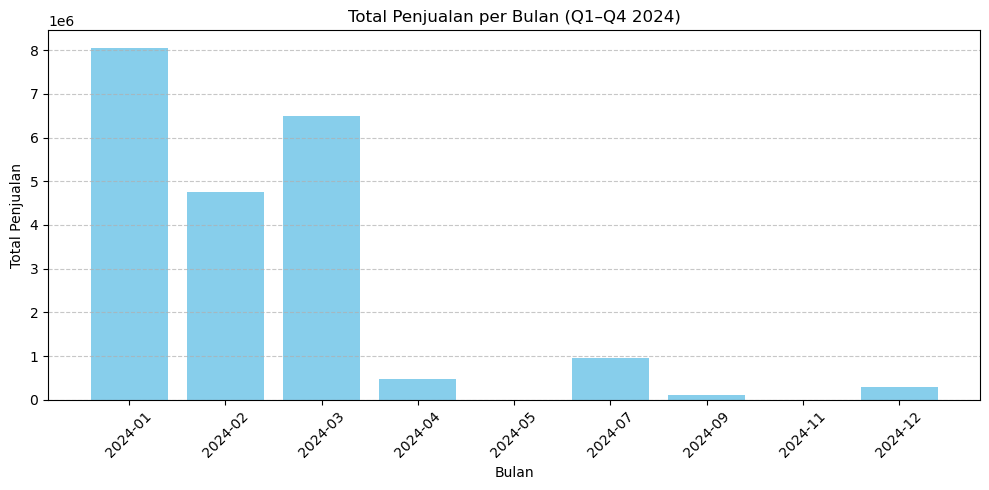

In [24]:
# Membuat grafik

import matplotlib.pyplot as plt

# Konversi Period ke string agar bisa tampil di sumbu x
penjualan_bulanan.index = penjualan_bulanan.index.astype(str)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(penjualan_bulanan.index, penjualan_bulanan.values, color='skyblue')
plt.title('Total Penjualan per Bulan (Q1–Q4 2024)')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [28]:
# Hitung rata-rata jumlah per transaksi untuk tiap produk
rata_rata_jumlah = df.groupby('Nama Produk')['Jumlah'].mean().sort_values(ascending=False)
rata_rata_jumlah.head(10)

Nama Produk
sepatu    2.102041
kemeja    2.058824
kaos      1.629630
celana    1.583333
tas       1.583333
topi      1.466667
Name: Jumlah, dtype: float64

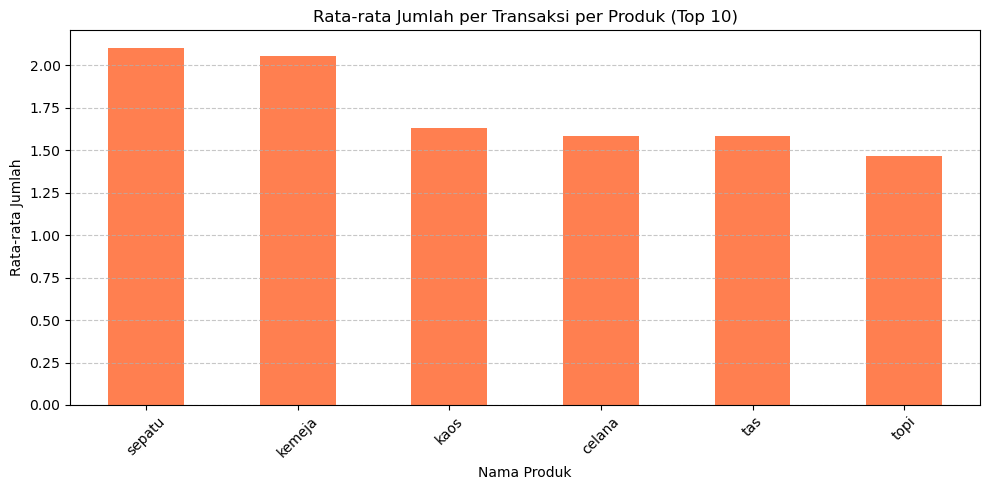

In [29]:
rata_rata_jumlah.head(10).plot(kind='bar', figsize=(10,5), color='coral')
plt.title('Rata-rata Jumlah per Transaksi per Produk (Top 10)')
plt.xlabel('Nama Produk')
plt.ylabel('Rata-rata Jumlah')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()